In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import numpy as np

In [2]:
path="D:/Audio_classifier/Data/BEEP_6/time_stretch_0.6003_Beep_6.wav"
Data,sr=librosa.load(path)

In [3]:
Audio(path)

In [4]:
stft=librosa.stft(Data)

In [5]:
spectrogram_db=librosa.amplitude_to_db(abs(stft))

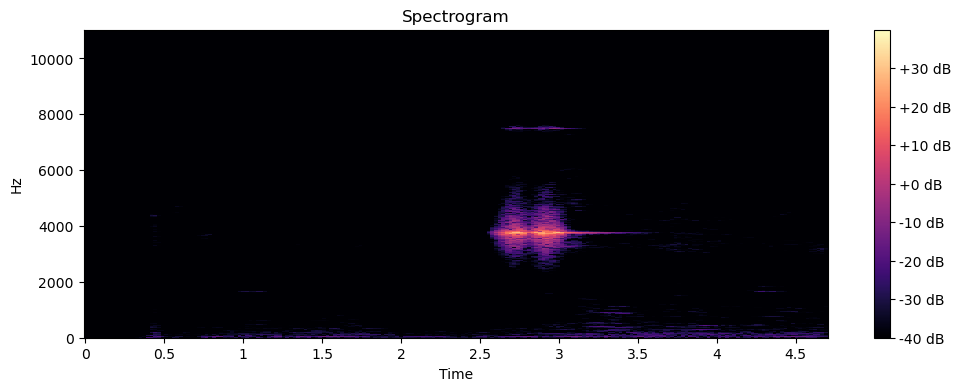

In [6]:
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram_db,sr=sr,x_axis= 'time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [7]:
metadata=pd.read_csv("./Data/NewData.csv")
metadata.head()

,File Name,Chime Class
0,noise_Beep_6.wav,6
1,time_stretch_0.6001_Beep_6.wav,6
2,time_stretch_0.6001_Beep_9.wav,9
3,time_stretch_0.6002_Beep_6.wav,6
4,time_stretch_0.6002_Beep_9.wav,9


In [8]:
mfcc=librosa.feature.mfcc(y=Data,sr=sr,n_mfcc=40)
mfcc

array([[-6.8055200e+02, -6.8055200e+02, -6.8055200e+02, ...,
        -6.3003583e+02, -6.3253979e+02, -6.4918317e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.3425262e+01,  4.1940865e+01,  3.1238670e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.1921185e+01,  2.0214611e+01,  2.0335209e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.9522934e+00,  5.9591098e+00,  5.1344328e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.6153116e+00,  5.6019087e+00,  5.5008259e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.0231438e+00, -7.0455688e-01, -5.1450205e-01]], dtype=float32)

In [9]:
import os
Directory="D:/Audio_classifier/Data/ALL_AUDIO"

In [10]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
Extracted_features=[]
for index,row in metadata.iterrows():
    file_name=row["File Name"]
    path_finder=os.path.join(Directory,file_name)
    path_finder=path_finder.replace('\\','/')
    final_class=row['Chime Class']
    MFCC_Data=features_extractor(path_finder)
    Extracted_features.append([MFCC_Data,final_class])


In [12]:
MFCC_data=features_extractor(path)
print(MFCC_data)

[-6.4071753e+02  2.4040695e+01  1.7862976e+01  3.1504917e+01
  4.9214845e+00  9.8617945e+00  2.0574125e+01  1.0273875e+00
  4.7365513e+00  1.1066880e+01 -3.0980389e+00  1.3563571e+00
  5.8549709e+00  1.6646839e+00  4.3717113e+00  5.4388480e+00
  3.2420737e-01  1.7311039e+00  5.4694757e+00 -1.7186282e-02
  2.0940175e+00  1.9214028e+00 -1.1071833e+00  8.0131477e-01
  8.3296013e-01 -4.9315557e-01  1.1369970e+00  9.2916572e-01
 -1.4821662e+00  2.0020394e+00 -1.0638579e+00 -4.0758547e-01
  2.1906085e+00 -1.4909800e+00 -2.7934296e-02  2.2925942e+00
 -1.7638229e-01  2.7844512e-01  3.1901445e+00 -1.8284307e+00]


In [13]:
Audio_data_df=pd.DataFrame(Extracted_features,columns=['Features',"Class"])

In [14]:
Audio_data_df.head()

,Features,Class
0,"[-129.8863, 69.51676, -72.090385, 66.855194, -...",6
1,"[-640.68604, 24.05327, 17.852665, 31.509146, 4...",6
2,"[-444.639, 16.911505, -2.0841103, -10.341681, ...",9
3,"[-640.7082, 24.044388, 17.86829, 31.517332, 4....",6
4,"[-444.64328, 16.907885, -2.0855489, -10.343787...",9


In [15]:
#Dividing dataset into dependent and independent features
X=np.array(Audio_data_df['Features'].tolist())
y=np.array(Audio_data_df['Class'].tolist())

In [16]:
X.shape

(11016, 40)

In [17]:
### Label Encoding
y=np.array(pd.get_dummies(y))
y.shape

(11016, 5)

In [18]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8812, 40)
(2204, 40)
(8812, 5)
(2204, 5)


In [21]:
class_list=[6,9,12,14,16]

# Model Creation and Training

In [22]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [24]:
#Number of classes
num_labels=y.shape[1]

In [25]:
#Model creation
model=Sequential()

#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
#Model Training

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

Checkpoint_path= 'D:/Audio_classifier/model_checkpoint_new.h5'
checkpointer = ModelCheckpoint(filepath=Checkpoint_path, verbose=1, save_best_only=True)
start = datetime.now()



In [29]:
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
275/276 [============================>.] - ETA: 0s - loss: 13.3504 - accuracy: 0.2825
Epoch 1: val_loss improved from inf to 1.60759, saving model to D:/Audio_classifier\model_checkpoint_new.h5
276/276 [==============================] - 2s 3ms/step - loss: 13.3341 - accuracy: 0.2830 - val_loss: 1.6076 - val_accuracy: 0.1910
Epoch 2/100
274/276 [============================>.] - ETA: 0s - loss: 1.8089 - accuracy: 0.3256
Epoch 2: val_loss improved from 1.60759 to 1.33457, saving model to D:/Audio_classifier\model_checkpoint_new.h5
276/276 [==============================] - 1s 2ms/step - loss: 1.8093 - accuracy: 0.3251 - val_loss: 1.3346 - val_accuracy: 0.4560
Epoch 3/100
269/276 [============================>.] - ETA: 0s - loss: 1.3664 - accuracy: 0.4339
Epoch 3: val_loss improved from 1.33457 to 0.84750, saving model to D:/Audio_classifier\model_checkpoint_new.h5
276/276 [==============================] - 1s 2ms/step - loss: 1.3637 - accuracy: 0.4346 - val_loss: 0.8475 - val

266/276 [===========================>..] - ETA: 0s - loss: 0.0146 - accuracy: 0.9974
Epoch 27: val_loss did not improve from 0.00060
276/276 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9975 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 28/100
248/276 [=========================>....] - ETA: 0s - loss: 0.0132 - accuracy: 0.9971
Epoch 28: val_loss improved from 0.00060 to 0.00037, saving model to D:/Audio_classifier\model_checkpoint_new.h5
276/276 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 3.7451e-04 - val_accuracy: 1.0000
Epoch 29/100
270/276 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9976
Epoch 29: val_loss did not improve from 0.00037
276/276 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 9.0128e-04 - val_accuracy: 0.9995
Epoch 30/100
262/276 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9964
Epoch 30: v

Epoch 56/100
257/276 [==========================>...] - ETA: 0s - loss: 0.0154 - accuracy: 0.9960
Epoch 56: val_loss did not improve from 0.00026
276/276 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.9961 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 57/100
255/276 [==========================>...] - ETA: 0s - loss: 0.0142 - accuracy: 0.9966
Epoch 57: val_loss did not improve from 0.00026
276/276 [==============================] - 1s 2ms/step - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 58/100
252/276 [==========================>...] - ETA: 0s - loss: 0.0118 - accuracy: 0.9964
Epoch 58: val_loss did not improve from 0.00026
276/276 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.0062 - val_accuracy: 0.9995
Epoch 59/100
272/276 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9964
Epoch 59: val_loss did not improve from 0.00026
276/276 [==============

Epoch 86/100
255/276 [==========================>...] - ETA: 0s - loss: 0.0211 - accuracy: 0.9935
Epoch 86: val_loss did not improve from 0.00026
276/276 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 5.9012e-04 - val_accuracy: 0.9995
Epoch 87/100
263/276 [===========================>..] - ETA: 0s - loss: 0.0194 - accuracy: 0.9924
Epoch 87: val_loss did not improve from 0.00026
276/276 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9926 - val_loss: 6.5419e-04 - val_accuracy: 0.9995
Epoch 88/100
267/276 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9931
Epoch 88: val_loss did not improve from 0.00026
276/276 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 6.5523e-04 - val_accuracy: 0.9995
Epoch 89/100
267/276 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9939
Epoch 89: val_loss did not improve from 0.00026
276/276 [==

In [30]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9995462894439697


In [31]:
filename="D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027399999999997_Beep_14.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)


In [32]:
prediction_feature

array([[-4.5558350e+02,  3.2496262e+01,  1.6356192e+01,  3.8502066e+00,
        -3.3569391e+00, -4.7444334e+00, -4.4681044e+00, -4.0183449e+00,
        -1.7915782e+00,  4.0884484e-02,  9.0612775e-01,  3.1486769e+00,
         5.2455134e+00,  4.9446445e+00,  3.9146614e+00,  3.9008551e+00,
         5.4232688e+00,  6.3782063e+00,  4.7852831e+00,  3.0769165e+00,
         3.4690223e+00,  4.3325171e+00,  3.4369416e+00,  1.5318402e+00,
         2.9555100e-01,  1.3211946e-02, -9.0938950e-01, -2.1344388e+00,
        -1.3821929e+00, -5.0515378e-01, -1.4802405e-01,  7.8942281e-01,
         1.9143409e+00,  3.7685180e+00,  4.3931189e+00,  2.6594539e+00,
         7.0081609e-01, -4.3604252e-01, -8.3190691e-01, -1.2347627e+00]],
      dtype=float32)

In [33]:
prediction_probabilities = model.predict(prediction_feature)
predicted_class = prediction_probabilities.argmax(axis=-1)

print("Predicted class:", class_list[predicted_class[0]])

1/1 [==============================] - 0s 79ms/step
Predicted class: 14


In [34]:
prediction_probabilities

array([[4.3553825e-23, 6.1281138e-34, 1.8338392e-21, 1.0000000e+00,
        6.4885882e-22]], dtype=float32)

# Pickling 

In [35]:
def Pickle_features_extractor(audio,sample_rate):
    
    # Convert audio data to floating-point format
    audio = audio.astype(np.float32) / 32767.0
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    
    return mfccs_scaled_features

In [36]:
import joblib
joblib.dump((model,Pickle_features_extractor),'model_new.pkl')

['model_new.pkl']

In [37]:
model,features_extractor=joblib.load('model_new.pkl')

In [38]:
def class_prediction(audio,sample_rate):
    #print(sample_rate)
    #print(type(audio))
    preprocessed_data=Pickle_features_extractor(audio,sample_rate)
    prediction_probabilities = model.predict(preprocessed_data)
    predicted_class = prediction_probabilities.argmax(axis=-1)

    print("Predicted class:", class_list[predicted_class[0]])

In [39]:
some_path="D:/Audio_classifier/Data/ALL_AUDIO/time_stretch_1.027399999999997_Beep_14.wav"
audio, sample_rate = librosa.load(some_path)
print(sample_rate)
print(type(audio))
print(audio)

22050
<class 'numpy.ndarray'>
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.6117594e-05 7.4066775e-05
 0.0000000e+00]


In [40]:
class_prediction(audio,sample_rate)

1/1 [==============================] - 0s 63ms/step
Predicted class: 6


# Real time testing 

In [41]:
!pip install pyaudio

In [42]:
import pyaudio
import wave
import time

# Parameters
sample_rate = 22050  # Sample rate in Hz
duration = 60  # Duration in seconds
output_filename = "recorded_audio.wav"

# Initialize audio stream
audio = pyaudio.PyAudio()

# Open a new audio stream
stream = audio.open(format=pyaudio.paInt16, channels=1, rate=sample_rate, input=True, frames_per_buffer=55125)

print("Recording...")

frames = []

try:
    start_time = time.time()
    while time.time() - start_time < duration:
        data = stream.read(55125)
        frames.append(data)
        
        # Convert the byte data to a NumPy array
        audio_data = np.frombuffer(data, dtype=np.int16)
        
        #print(type(audio_data),f"the data is: {audio_data}")
        
        #function Class_prediction(data) for prediction
        prediction = class_prediction(audio_data,sample_rate)
        
except KeyboardInterrupt:
    pass

print("Finished recording.")

# Close and terminate the audio stream
stream.stop_stream()
stream.close()
audio.terminate()

# Save the recorded audio to a WAV file
with wave.open(output_filename, 'wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
    wf.setframerate(sample_rate)
    wf.writeframes(b''.join(frames))

print(f"Audio saved as {output_filename}")


Recording...
1/1 [==============================] - 0s 13ms/step
Predicted class: 16
1/1 [==============================] - 0s 21ms/step
Predicted class: 16
1/1 [==============================] - 0s 744us/step
Predicted class: 16
1/1 [==============================] - 0s 12ms/step
Predicted class: 16
1/1 [==============================] - 0s 22ms/step
Predicted class: 16
1/1 [==============================] - 0s 13ms/step
Predicted class: 6
1/1 [==============================] - 0s 21ms/step
Predicted class: 16
1/1 [==============================] - 0s 13ms/step
Predicted class: 16
1/1 [==============================] - 0s 0s/step
Predicted class: 16
1/1 [==============================] - 0s 16ms/step
Predicted class: 16
1/1 [==============================] - 0s 21ms/step
Predicted class: 16
1/1 [==============================] - 0s 31ms/step
Predicted class: 16
1/1 [==============================] - 0s 16ms/step
Predicted class: 16
1/1 [==============================] - 0s 20ms/step
P